### Lead Scoring Case Study

#### Problem statement:
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The `typical lead conversion rate at X education is around 30%`; although X Education gets a lot of leads, its lead conversion rate is very poor.
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
The company requires you to `build a model` wherein you need to assign a lead score to each of the leads such that the `customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance`. The CEO, in particular, has given a ballpark of the `target lead conversion rate to be around 80%`.


#### Goals of the Case Study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. Such as:

        a. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.
        b. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.


#### Importing the libraries

In [1]:
#To supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the useful libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Data Sourcing

In [3]:
#Read the data set of "leads.csv"

lead_data = pd.read_csv('Leads.csv')

#### Inspecting the dataframe

In [4]:
#Let's see the top 5 entries in the dataset

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Look at shape of dataset: to know the no. of rows and columns

lead_data.shape

(9240, 37)

In [6]:
#Check the columns in the dataset: to know the feature variables

lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
#Let's look at the statistical aspect of the dataset

lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Let's see the data type of each column and the null values within them

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are few numerical and more categorical variables present in the dataset. We can observe that lot of null values are  present in 'Asymmetrique' related variables and few other columns; let's look into these further and treat them accordingly 

### Data Preparation

##### Checking for missing values and inputing them

In [9]:
#Adding up the missing values (column-wise)

lead_data.isnull().sum()   

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# checking the percentage of missing values and sort them in descending order for better understanding

Missing_perc = round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

#To see top 15 missing feature variables

Missing_perc.sort_values(ascending=False).head(15)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
dtype: float64

In [11]:
# Drop all the columns having missing value > 30%

colums_to_drop =[col for col in Missing_perc.index if Missing_perc[col]> 30]

lead_data.drop(colums_to_drop, 1, inplace=True)

In [12]:
# Re-checking the percentage of missing values & sort them in descending order

Missing_perc = round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

#To see top 15 missing feature variables

Missing_perc.sort_values(ascending=False).head(15)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
dtype: float64

In [13]:
#Let's look into these feature variables individually to understand it's importance in our analysis to retain / to drop

#'What matters most to you in choosing a course' column data

lead_data["What matters most to you in choosing a course"].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

This variable has 99.9% of inclination towards 'Better Career Prospects' which doesn't signifies much in the analysis. Hence, lets drop this variable.

In [14]:
lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [15]:
#'Lead Profile' column data

lead_data["Lead Profile"].value_counts(normalize=True)*100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

Looks like in this column 63.5% of data has 'Select' value that says no option selected (which is missing data and is >30% of thershold value considered above for missing percentage) so this variable doesn't give much insights. So lets drop this column.

In [16]:
lead_data.drop(['Lead Profile'], axis = 1, inplace=True)

In [17]:
# 'What is your current occupation' column data

lead_data["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Data looks significant in this column; so let's retain it as is for now.

**'Country' and 'City' columns**

Since X Education sells courses online, we don't see the importance of 'Country' and 'City' influencing the target variable. So let's drop these two columns.

In [18]:
Column_to_drop = ['Country','City']

lead_data.drop(Column_to_drop, axis = 1, inplace = True)

In [19]:
#'How did you hear about X Education' column data

lead_data["How did you hear about X Education"].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

Here also like observed above, ~72% of data has 'Select' value that says no option selected (>30% of missing values) so this variable also doesn't give much insights. So lets drop this column.

In [20]:
lead_data.drop(['How did you hear about X Education'], axis = 1, inplace=True)

In [21]:
# Re-checking the percentage of missing values & sort them in descending order

Missing_perc = round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Missing_perc.sort_values(ascending=False)

What is your current occupation             29.11
Specialization                              15.56
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
X Education Forums                           0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
Lead Number                                  0.00


**'What is your current occupation'** column has ~30% of missing values but we observed above that this variable has significant data for our analysis. So, let's retain this column but we'll drop those rows with null values.

In [22]:
# Drop the null value rows in the column 'What is your current occupation'

lead_data = lead_data[~pd.isnull(lead_data['What is your current occupation'])]

In [23]:
# Re-checking the percentage of missing values & sort them in descending order

Missing_perc = round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Missing_perc.sort_values(ascending=False).head() #top 5

TotalVisits             1.98
Page Views Per Visit    1.98
Last Activity           1.57
Lead Source             0.55
Specialization          0.27
dtype: float64

**'TotalVisits'** column has ~2% of missing values, which is quite less. So, here also, let's drop those rows with null value.

In [24]:
# Drop the null value rows in the column 'TotalVisits'

lead_data = lead_data[~pd.isnull(lead_data['TotalVisits'])]

In [25]:
#TotalVisits column data- check the values % this feature hold

lead_data["TotalVisits"].value_counts(normalize=True)*100

0.0      21.417445
2.0      19.127726
3.0      14.641745
4.0      12.850467
5.0       9.003115
6.0       5.249221
1.0       4.205607
7.0       3.504673
8.0       2.538941
9.0       1.993769
10.0      1.183801
11.0      1.090343
13.0      0.607477
12.0      0.482866
14.0      0.436137
16.0      0.249221
15.0      0.218069
17.0      0.186916
18.0      0.186916
20.0      0.155763
19.0      0.093458
27.0      0.077882
23.0      0.077882
21.0      0.077882
24.0      0.046729
25.0      0.046729
22.0      0.046729
26.0      0.031153
29.0      0.031153
55.0      0.015576
251.0     0.015576
74.0      0.015576
42.0      0.015576
28.0      0.015576
115.0     0.015576
43.0      0.015576
30.0      0.015576
32.0      0.015576
Name: TotalVisits, dtype: float64

In [26]:
# Re-checking the percentage of missing values & sort them in descending order

Missing_perc = round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Missing_perc.sort_values(ascending=False).head() #top 5

Lead Source                               0.45
Specialization                            0.28
Prospect ID                               0.00
Magazine                                  0.00
A free copy of Mastering The Interview    0.00
dtype: float64

**'Lead Source'** column and **'Specialization'** column has ~0.5% and ~0.3% of missing values respectively, which is very less. So, here also, let's drop those rows with null value.

In [27]:
# Drop the null value rows in the column 'Lead Source'

lead_data = lead_data[~pd.isnull(lead_data['Lead Source'])]

In [28]:
#'Lead Source' column data- check the values % this feature hold

lead_data["Lead Source"].value_counts(normalize=True)*100

Google               32.045063
Direct Traffic       29.588484
Olark Chat           13.957127
Organic Search       13.612893
Reference             6.931623
Welingak Website      2.018463
Referral Sites        1.173525
Facebook              0.438116
Click2call            0.062588
bing                  0.046941
Social Media          0.031294
Live Chat             0.031294
testone               0.015647
Press_Release         0.015647
Pay per Click Ads     0.015647
WeLearn               0.015647
Name: Lead Source, dtype: float64

In [29]:
# Drop the null value rows in the column 'Specialization'

lead_data = lead_data[~pd.isnull(lead_data['Specialization'])]

In [30]:
#'Specialization' column data- check the values % this feature hold

lead_data["Specialization"].value_counts(normalize=True)*100

Select                               28.840421
Finance Management                   11.689942
Human Resource Management            10.434646
Marketing Management                 10.403264
Operations Management                 6.135258
Business Administration               4.864271
IT Projects Management                4.362153
Supply Chain Management               4.315079
Banking, Investment And Insurance     4.173858
Media and Advertising                 2.526283
Travel and Tourism                    2.337988
International Business                2.134003
Healthcare Management                 1.914326
Hospitality Management                1.412208
E-COMMERCE                            1.255296
Retail Management                     1.223913
Rural and Agribusiness                0.910089
E-Business                            0.674721
Services Excellence                   0.392280
Name: Specialization, dtype: float64

Here also, in 'Specialization' variable we observe that ~29% of data has 'Select' value that says no option selected but in this feature data is distributed across different values within. So, we can't drop this column as it might give some insights to our analysis. So, let's only drop those rows with 'Select' values.

In [31]:
lead_data= lead_data[lead_data["Specialization"]!= 'Select']

#Rechecking 'Specialization' column data

lead_data["Specialization"].value_counts(normalize=True)*100

Finance Management                   16.427784
Human Resource Management            14.663727
Marketing Management                 14.619625
Operations Management                 8.621830
Business Administration               6.835722
IT Projects Management                6.130099
Supply Chain Management               6.063947
Banking, Investment And Insurance     5.865491
Media and Advertising                 3.550165
Travel and Tourism                    3.285557
International Business                2.998897
Healthcare Management                 2.690187
Hospitality Management                1.984564
E-COMMERCE                            1.764057
Retail Management                     1.719956
Rural and Agribusiness                1.278942
E-Business                            0.948181
Services Excellence                   0.551268
Name: Specialization, dtype: float64

In [32]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,No,No,No,No,No,No,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website


In [33]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
#let's get the value counts of all the remaining columns

[print(lead_data[column].value_counts(), '\n' + '. '*50) for column in lead_data]

1ffbafaa-e8f5-49c9-8c0c-d3c6f0f9596f    1
d522a3d3-f0c6-4075-b802-79bee9ef91c7    1
2b4028a4-f532-46c1-95f4-957ba14a69a0    1
93d2a6cd-e589-48b4-8f26-eeeea380d3ee    1
9324a67e-30f5-4652-9617-5ea331e0ad51    1
                                       ..
eb2aecac-f1ef-4480-a437-7790c59028f0    1
967e5613-3979-4907-915a-fd978a7dd1be    1
e2b7bbc7-b703-483c-b02f-21b479d303c0    1
f304391a-7e94-4425-9c0e-109f2a50e9a1    1
195847c5-d885-4d78-8f09-d2643b9aef0c    1
Name: Prospect ID, Length: 4535, dtype: int64 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
655360    1
602415    1
636208    1
648494    1
592374    1
         ..
613070    1
649936    1
615121    1
637650    1
651262    1
Name: Lead Number, Length: 4535, dtype: int64 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Landing Page Submission    3564
API                         604
Lead Add Form               353
Lead Import   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [35]:
#check for duplicates in columns Prospect ID and Lead Number; result indicates there are no duplicates in both the columns
print(lead_data['Prospect ID'].duplicated().any())
print(lead_data['Lead Number'].duplicated().any())

False
False


We can observe that data in 'Prospect ID' and 'Lead Number' won't be of any use in the analysis as these are unquie values assigned by the company to each customer. So it's best that we drop these two variables.

In [36]:
Column_to_drop = ['Prospect ID' , 'Lead Number']

lead_data.drop(Column_to_drop, axis = 1, inplace = True)

We can observe in the following columns:
**'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'**

Data is more inclined towards one value response 'No', which doesn't signifies much in the analysis. Hence, like before, lets drop this variable.

In [37]:
Column_to_drop = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                  'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                  'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

lead_data.drop(Column_to_drop, axis = 1, inplace = True)

In [38]:
#Let's see how our data set looks now

lead_data.reset_index(drop=True, inplace=True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
1,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
2,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
3,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
4,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


In [39]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4535 non-null   object 
 1   Lead Source                             4535 non-null   object 
 2   Do Not Email                            4535 non-null   object 
 3   Converted                               4535 non-null   int64  
 4   TotalVisits                             4535 non-null   float64
 5   Total Time Spent on Website             4535 non-null   int64  
 6   Page Views Per Visit                    4535 non-null   float64
 7   Last Activity                           4535 non-null   object 
 8   Specialization                          4535 non-null   object 
 9   What is your current occupation         4535 non-null   object 
 10  A free copy of Mastering The Interview  4535 non-null   obje

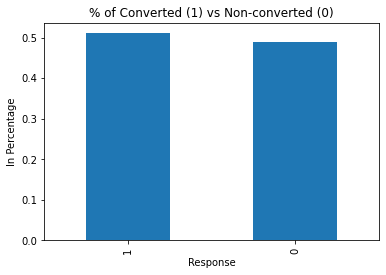

In [40]:
#Let's observe the percentage of converted and non-converted in the dataset

lead_data.Converted.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('% of Converted (1) vs Non-converted (0)')
plt.xlabel('Response')
plt.ylabel('In Percentage')
plt.show()

No data imbalance is observed in the given dataset. The percentage of conversion is around 50% and non-conversion 48%, which is near-equal distribution.

#### Visualization of  categorical variable levels distribution with 'Converted' variable

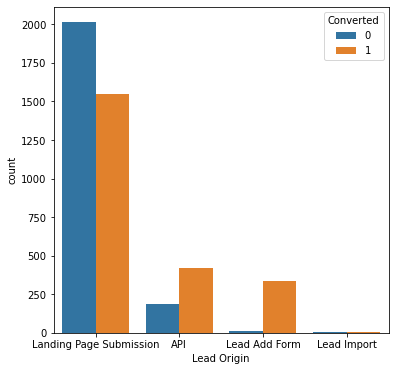

In [41]:
#Let's plot to observe Converted vs various Lead Origin

plt.figure(figsize=(6,6))
i=sns.countplot(lead_data["Lead Origin"], hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels())
plt.show()

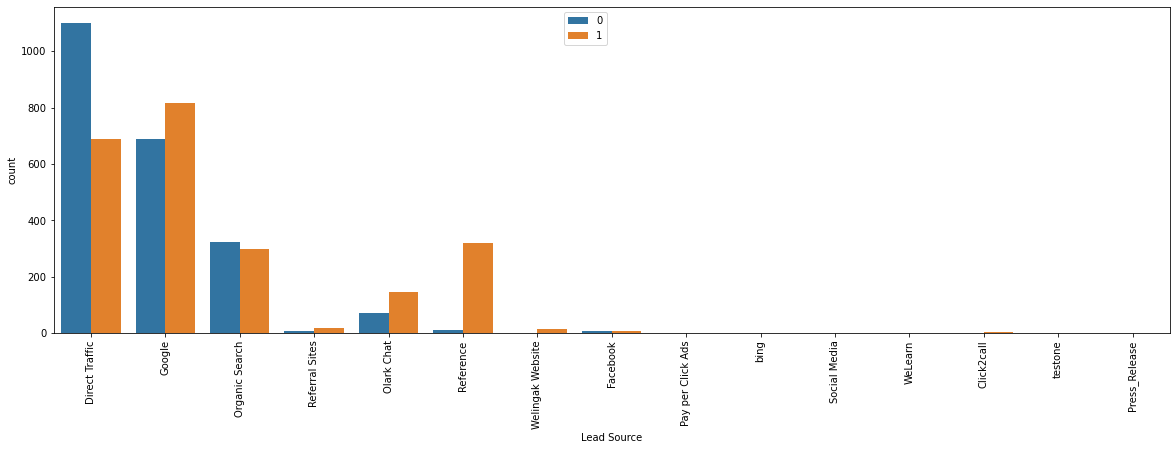

In [42]:
#Let's plot to observe Converted vs various Lead Source

plt.figure(figsize=(20,6))
i=sns.countplot(lead_data["Lead Source"], hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels(), rotation= 90)
plt.legend(bbox_to_anchor=(0.5,1)) 
plt.show()

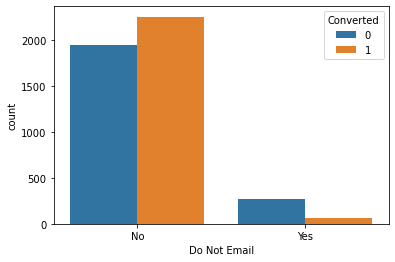

In [43]:
#Let's plot to observe Converted vs various Do Not Email

plt.figure(figsize=(6,4))
i=sns.countplot(lead_data["Do Not Email"], hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels())
plt.show()

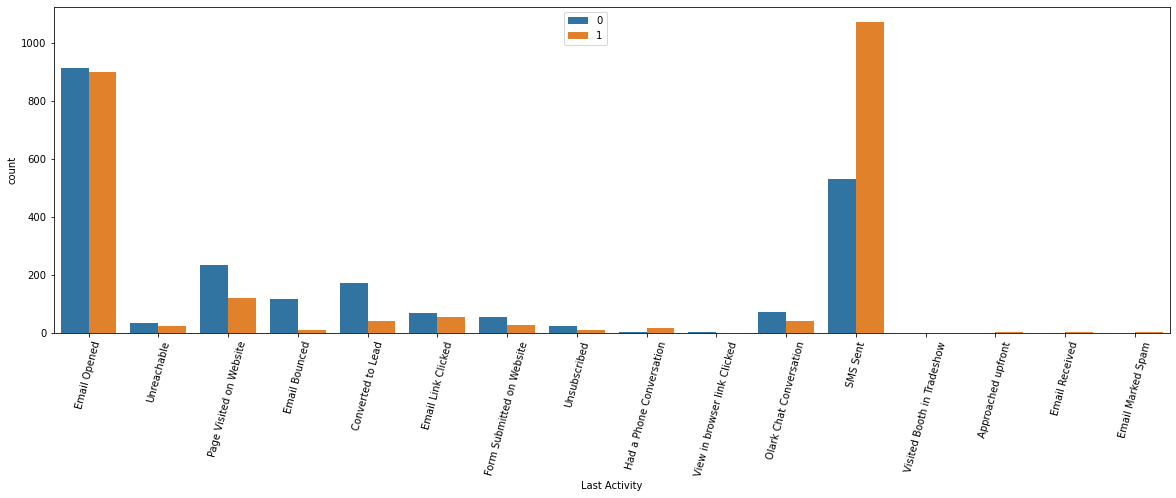

In [44]:
#Let's plot to observe Converted vs various Last Activity

plt.figure(figsize=(20,6))
i=sns.countplot(lead_data["Last Activity"], hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels(), rotation= 75)
plt.legend(bbox_to_anchor=(0.5,1)) 
plt.show()

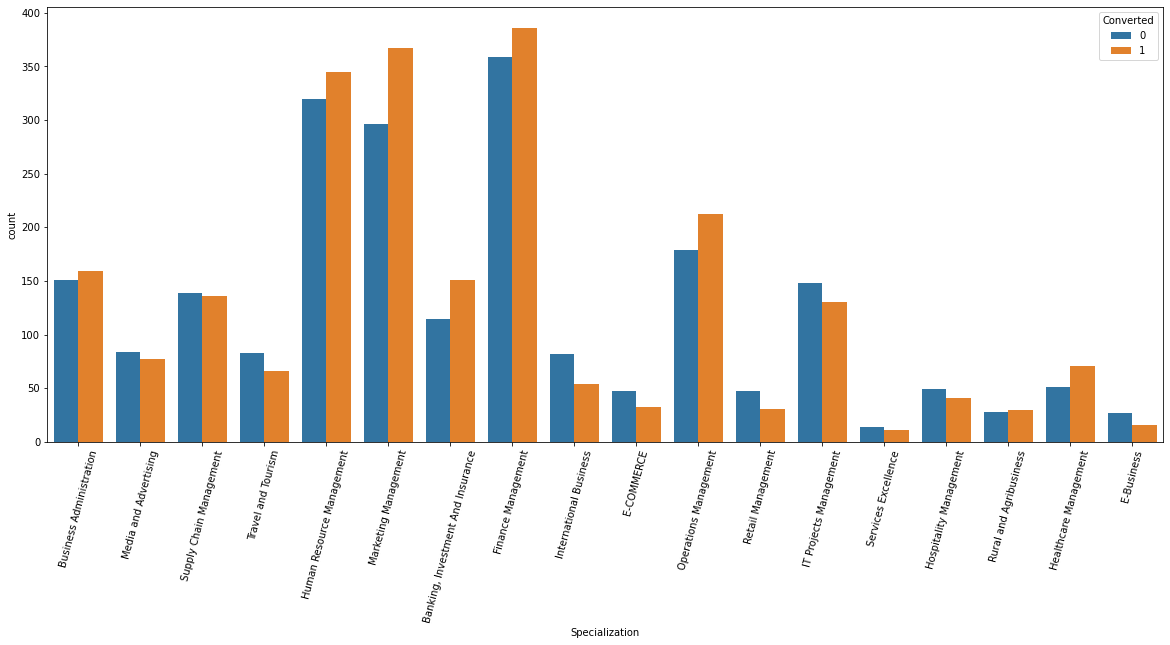

In [45]:
#Let's plot to observe Converted vs various specializations

plt.figure(figsize=(20,8))
i=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels(),rotation=75)
plt.show()

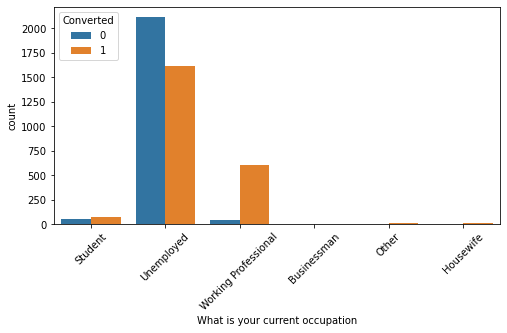

In [46]:
#Let's plot to observe Converted vs various What is your current occupation

plt.figure(figsize=(8,4))
i=sns.countplot(lead_data["What is your current occupation"], hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels(), rotation= 45)
plt.show()

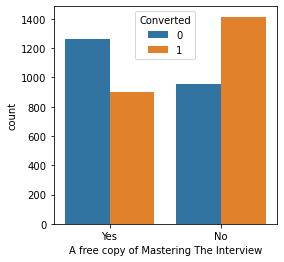

In [47]:
#Let's plot to observe Converted vs various A free copy of Mastering The Interview  

plt.figure(figsize=(4,4))
i=sns.countplot(lead_data["A free copy of Mastering The Interview"], hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels())
plt.show()

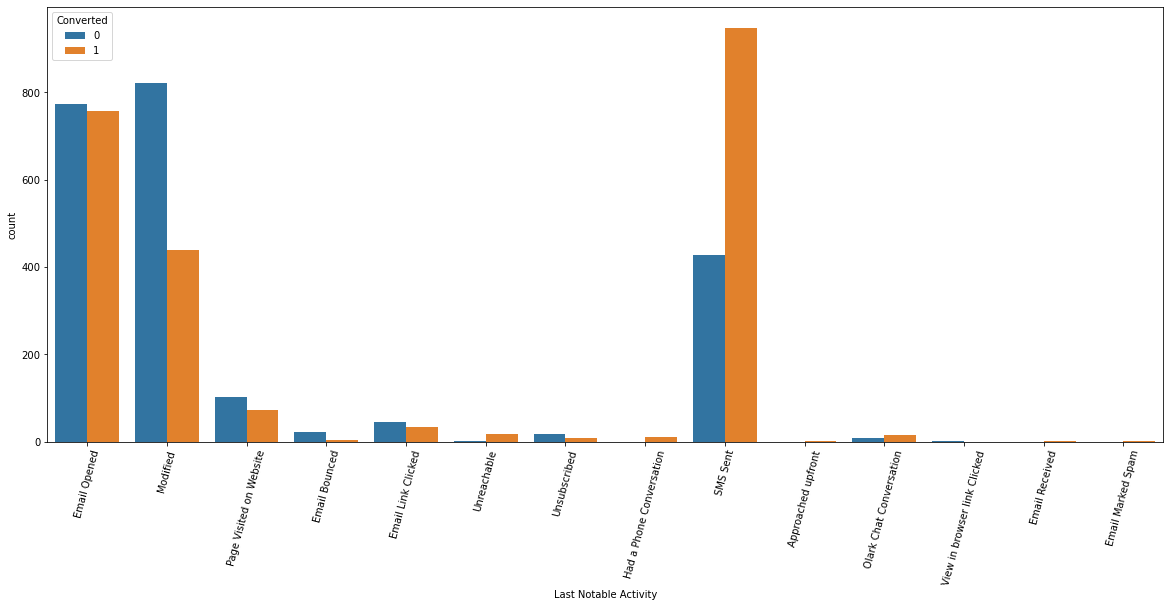

In [48]:
#Let's plot to observe Converted vs various Last Notable Activity   

plt.figure(figsize=(20,8))
i=sns.countplot(lead_data["Last Notable Activity"], hue=lead_data.Converted)
i.set_xticklabels(i.get_xticklabels(),rotation=75)
plt.show()

#### Looking at correaltion

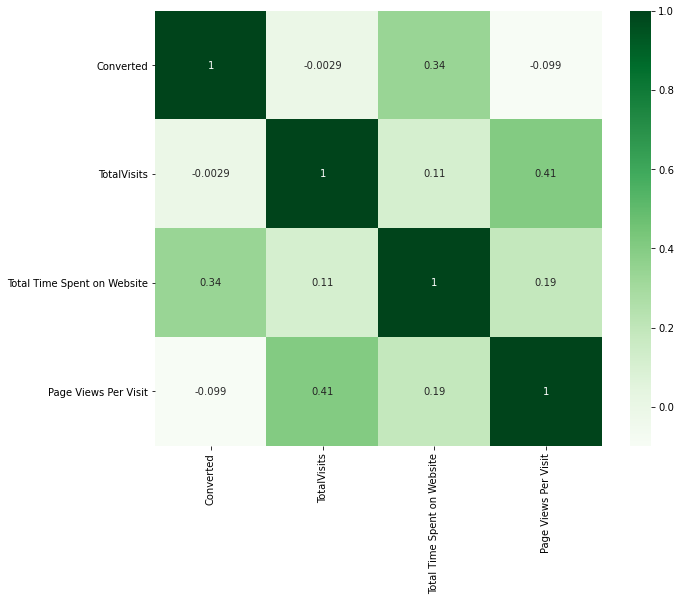

In [49]:
#Checking for correlation among numeric values

plt.figure(figsize=(10,8))
sns.heatmap(lead_data.corr(), cmap="Greens", annot=True)
plt.show()

We can't get much insight at this stage but we can observe slight correlation of 0.34 between 'total time spent on website' vs 'converted'. We might get better correlation insight in the upcoming steps.

##### Checking for outliers in continous variables- 

In [50]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4535 non-null   object 
 1   Lead Source                             4535 non-null   object 
 2   Do Not Email                            4535 non-null   object 
 3   Converted                               4535 non-null   int64  
 4   TotalVisits                             4535 non-null   float64
 5   Total Time Spent on Website             4535 non-null   int64  
 6   Page Views Per Visit                    4535 non-null   float64
 7   Last Activity                           4535 non-null   object 
 8   Specialization                          4535 non-null   object 
 9   What is your current occupation         4535 non-null   object 
 10  A free copy of Mastering The Interview  4535 non-null   obje

In [51]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4535.000000,4535.000000,4535.000000,4535.000000
mean,0.510695,4.293716,626.625358,2.937385
std,0.499941,5.451975,568.094959,2.143495
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,127.000000,2.000000
50%,1.000000,3.000000,391.000000,2.670000
75%,1.000000,5.000000,1119.500000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


As per the above stats value, we can observe high difference between mean and max values in 'TotalVisits' & 'Total Time Spent on Website' feature data. So let's check outliers at every 25% intervals and at 90%, 95% & 99%:

In [52]:
lead_data.describe(percentiles=[0.25,0.5,0.75, 0.9, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4535.000000,4535.000000,4535.000000,4535.000000
mean,0.510695,4.293716,626.625358,2.937385
std,0.499941,5.451975,568.094959,2.143495
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,127.000000,2.000000
50%,1.000000,3.000000,391.000000,2.670000
75%,1.000000,5.000000,1119.500000,4.000000
90%,1.000000,8.000000,1475.000000,5.000000
95%,1.000000,11.000000,1634.000000,6.551000
99%,1.000000,19.000000,1873.660000,9.000000


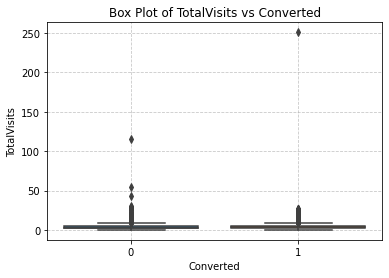

In [53]:
#Checking to see how 'TotalVisits' affects the Converted variable:

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data )
plt.title("Box Plot of TotalVisits vs Converted")
plt.grid(True, which='major', linestyle='--', alpha=0.7) 
plt.show()

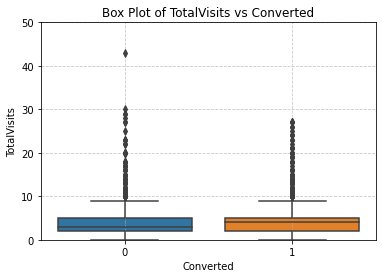

In [54]:
sns.boxplot(y='TotalVisits', x='Converted', data=lead_data)
plt.ylim(0, 50)
plt.title("Box Plot of TotalVisits vs Converted") 
plt.grid(True, which='major', linestyle='--', alpha=0.7)  
plt.show()


As observed there is no much significance in retaining the outliers in 'TotalVisits'; so let's remove these values

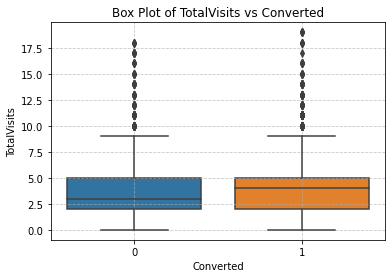

In [55]:
#Re-Checking to see how 'TotalVisits' affects the Converted variable:
lead_data = lead_data[(lead_data.TotalVisits <= lead_data.TotalVisits.quantile(0.99))]
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data )
plt.title("Box Plot of TotalVisits vs Converted")
plt.grid(True, which='major', linestyle='--', alpha=0.7) 
plt.show()

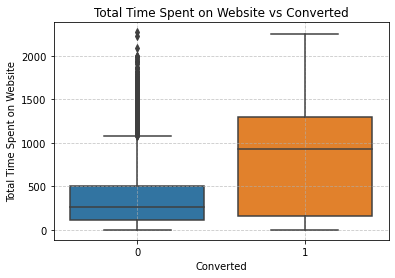

In [56]:
#Checking to see how 'Total Time Spent on Website' affects the 'Converted' variable:

sns.boxplot(x=lead_data['Converted'], y=lead_data['Total Time Spent on Website'])
plt.title("Total Time Spent on Website vs Converted")
plt.grid(True, which='major', linestyle='--', alpha=0.7) 
plt.show()

As per above box plot, we can observe spending sufficient time on the website is a good indication the outliers are retained as is.

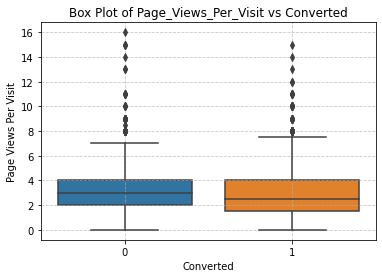

In [57]:
#Checking to see how 'Page Views Per Visit' affects the 'Converted' variable:

sns.boxplot(x=lead_data['Converted'], y=lead_data['Page Views Per Visit'])
plt.title("Box Plot of Page_Views_Per_Visit vs Converted") 
plt.grid(True, which='major', linestyle='--', alpha=0.7) 
plt.show()

Since, we've dropped lot of data. Let's retain these as is.

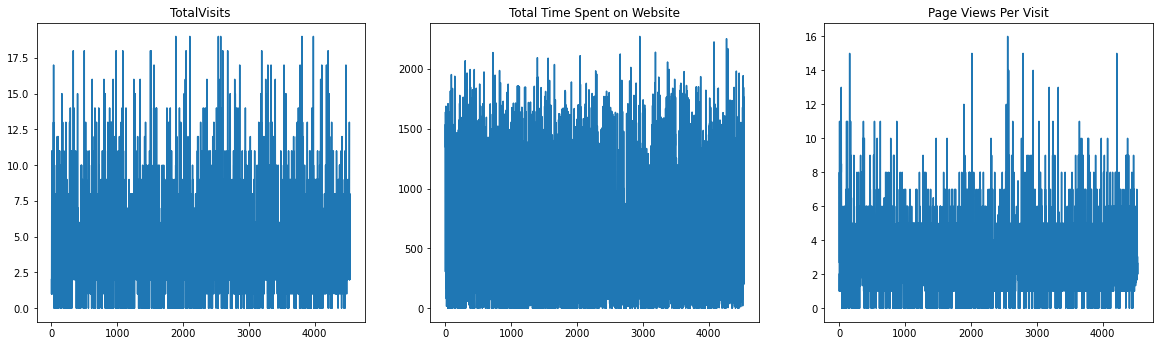

In [58]:
#let's also check the distribution of the 3 numeric variables

fig, ax = plt.subplots(ncols=3, sharex=True)

ax[0].plot(lead_data['TotalVisits'])
ax[0].set_title('TotalVisits')


ax[1].plot(lead_data['Total Time Spent on Website'])
ax[1].set_title('Total Time Spent on Website')


ax[2].plot(lead_data['Page Views Per Visit'])
ax[2].set_title('Page Views Per Visit')


fig.set_size_inches(20, 5.5, forward=True)

plt.show()

We can observe that data in these variables have many values with varying ranges. So, distribution is not normal distribution.

##### Check categorical variables present in the dataset

In [59]:
#Generating the list of columns that have categorical data

cols = lead_data.select_dtypes(include=['object']).columns
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Creating Dummy variable for the categorical varables

In [60]:
# Create dummy variables

dummy = pd.get_dummies(lead_data[cols], drop_first=True)

# Add the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
1,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,...,1,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [61]:
#Let's drop those original columns for which dummies have been created

lead_data.drop(cols, axis=1, inplace = True)

In [62]:
# Let's take a look at the dataset again

lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,2.0,1532,2.00,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1640,2.00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,8.0,1351,8.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,8.0,1343,2.67,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
lead_data.shape

(4492, 73)

In [64]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4492 entries, 0 to 4534
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             4492 non-null   int64  
 1   TotalVisits                                           4492 non-null   float64
 2   Total Time Spent on Website                           4492 non-null   int64  
 3   Page Views Per Visit                                  4492 non-null   float64
 4   Lead Origin_Landing Page Submission                   4492 non-null   uint8  
 5   Lead Origin_Lead Add Form                             4492 non-null   uint8  
 6   Lead Origin_Lead Import                               4492 non-null   uint8  
 7   Lead Source_Direct Traffic                            4492 non-null   uint8  
 8   Lead Source_Facebook                                  4492

#### Looking at correlations 

Let's recheck correlations; however, ploting heat map will not give much insight due high number of variables (73*73). So, let's view the correaltion values in a table.

In [65]:
# Looking at the correlation table

lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,-0.009802,0.335503,-0.099505,-0.290384,0.262223,-0.001195,-0.204008,-0.001195,0.043514,...,-0.023746,0.014606,0.050660,-0.200399,0.017638,-0.039962,0.236483,0.056934,-0.025113,-0.015244
TotalVisits,-0.009802,1.000000,0.226242,0.629920,0.291107,-0.351089,-0.062681,-0.057874,-0.062681,0.121510,...,0.040960,0.009538,0.048464,-0.114870,0.045876,0.180545,-0.017612,-0.006168,0.005950,0.019215
Total Time Spent on Website,0.335503,0.226242,1.000000,0.211487,0.161561,-0.263883,-0.061113,0.020064,-0.061113,0.163230,...,0.002279,0.003540,0.020859,-0.093857,0.035833,0.013573,0.085499,-0.002788,0.001331,-0.014114
Page Views Per Visit,-0.099505,0.629920,0.211487,1.000000,0.404042,-0.403095,-0.066118,-0.037522,-0.066118,0.164204,...,0.038423,0.000682,0.010872,-0.075647,-0.008566,-0.026163,0.047098,0.007593,0.035144,-0.001808
Lead Origin_Landing Page Submission,-0.290384,0.291107,0.161561,0.404042,1.000000,-0.557824,-0.106966,0.397190,-0.106966,0.067465,...,0.000881,0.007800,-0.025473,-0.004438,-0.033234,0.016769,0.005394,-0.041129,0.018440,-0.028547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Page Visited on Website,-0.039962,0.180545,0.013573,-0.026163,0.016769,-0.011972,-0.010815,0.029183,-0.010815,-0.022503,...,-0.138191,-0.002886,-0.010011,-0.120438,-0.013570,1.000000,-0.127997,-0.012606,-0.014758,-0.002886
Last Notable Activity_SMS Sent,0.236483,-0.017612,0.085499,0.047098,0.005394,0.033842,-0.037001,-0.003824,-0.037001,-0.018465,...,-0.472773,-0.009875,-0.034248,-0.412039,-0.046424,-0.127997,1.000000,-0.043129,-0.050491,-0.009875
Last Notable Activity_Unreachable,0.056934,-0.006168,-0.002788,0.007593,-0.041129,0.019288,-0.003644,-0.031655,-0.003644,0.012237,...,-0.046563,-0.000973,-0.003373,-0.040581,-0.004572,-0.012606,-0.043129,1.000000,-0.004973,-0.000973
Last Notable Activity_Unsubscribed,-0.025113,0.005950,0.001331,0.035144,0.018440,-0.022248,-0.004266,-0.001678,-0.004266,-0.010261,...,-0.054512,-0.001139,-0.003949,-0.047509,-0.005353,-0.014758,-0.050491,-0.004973,1.000000,-0.001139


In [66]:
#let's extract correlation values for converted variable

converted_corr= round(lead_data.corr()["Converted"],1)

In [67]:
#Checking positive correlation > 0.3

converted_corr[converted_corr>=0.3]

Converted                                               1.0
Total Time Spent on Website                             0.3
Lead Origin_Lead Add Form                               0.3
Lead Source_Reference                                   0.3
What is your current occupation_Working Professional    0.3
Name: Converted, dtype: float64

In [68]:
#Checking negative correlation <-0.3

converted_corr[converted_corr <= (-0.3)]

Lead Origin_Landing Page Submission          -0.3
What is your current occupation_Unemployed   -0.3
Name: Converted, dtype: float64

We can observe:

    1. ~0.3 weak positive correaltion between 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Reference' & 'What is your current occupation_Working Professional' vs the 'Converted'. 
    2. ~0.3 weak negative correaltion between 'Lead Origin_Landing Page Submission' & 'What is your current occupation_Unemployed' vs the 'Converted'

Now, let's start with logistic model by splitting the data into train and test sets.

### Test - Train split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Put the feature variables to X

X = lead_data.drop(columns=['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,2.0,1532,2.00,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.0,305,1.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1640,2.00,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,8.0,1351,8.00,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.0,1343,2.67,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
# Put the response variable to y

y = lead_data['Converted']

y.head()

0    1
1    0
2    1
3    1
4    1
Name: Converted, dtype: int64

In [72]:
# Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

Here, we are not using **StandardScalar**. As we observed in the above subplot, in the distribution of the 3 numerical variables, these variables have different scales and distribution wasn't normal/bell-curved . So we're scaling these variables using **MinMaxScaler** to ensure uniformity across different scales.

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Scale the numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 
         'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit',
                                                                         'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3303,0.210526,0.673415,0.133333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4262,0.105263,0.448504,0.133333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1024,0.473684,0.097271,0.200000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
668,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2262,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model Building

Let's start by spliting our data into a training set and a test set.

In [75]:
#Running first traing model

import statsmodels.api as sm

#Logistic regression model

log_m1=sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3075
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2024   Deviance:                       85380.
Time:                        15:20:00   Pearson chi2:                 4.17e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.327e+15   1.07e+08   1.24e+07      0.000    1.33e+15    1.33e+15
TotalVisits                                           4.559e+14   1.06e+07    4.3e+07      0.000    4.56e+14    4.56e+14
Total Time Spent on Website                           3.186e+15   5.29e+06   6.02e+08      0.000    3.19e+15    3.19e+15
Page Views Per Visit                                 -7.133e+14   1.35e+07  -5.29e+07      0.000   -7.13e+14   -7.13e+14
Lead Origin_Landing Page Submission                   5.351e+14   4.62e+06   1.16e+08      0.000    5.35e+14    5.35e+14
Lead Origin_Lead Add Form                             5.499e+14   6.75e+07   8.15e+06      0.000     5.5e+14     5.5e+14
Lead Origin_Lead Import                               9.571e+14   4.03e+07   2.38e+07      0.000    9.57e+14    9.57e+14
Lead Source_Direct Traffic                            5.093e+13   7.79e+07   6.54e+05      0.000    5.09e+13    5.09e+13
Lead Source_Facebook                                  9.571e+14   4.03e+07   2.38e+07      0.000    9.57e+14    9.57e+14
Lead Source_Google                                    1.648e+14   7.78e+07   2.12e+06      0.000    1.65e+14    1.65e+14
Lead Source_Olark Chat                                1.505e+15   7.81e+07   1.93e+07      0.000     1.5e+15     1.5e+15
Lead Source_Organic Search                            2.123e+14   7.79e+07   2.73e+06      0.000    2.12e+14    2.12e+14
Lead Source_Pay per Click Ads                        -4.314e+15   1.03e+08  -4.19e+07      0.000   -4.31e+15   -4.31e+15
Lead Source_Press_Release                            -4.245e+15   1.03e+08   -4.1e+07      0.000   -4.24e+15   -4.24e+15
Lead Source_Reference                                 1.513e+15   3.92e+07   3.86e+07      0.000    1.51e+15    1.51e+15
Lead Source_Referral Sites                             6.48e+13   7.92e+07   8.18e+05      0.000    6.48e+13    6.48e+13
Lead Source_Social Media                              4.608e+15   1.04e+08   4.45e+07      0.000    4.61e+15    4.61e+15
Lead Source_WeLearn                                    -13.5077   3.25e-07  -4.16e+07      0.000     -13.508     -13.508
Lead Source_Welingak Website                          4.803e+15   4.34e+07   1.11e+08      0.000     4.8e+15     4.8e+15
Lead Source_bing                                      8.501e+14   9.12e+07   9.32e+06      0.000     8.5e+14     8.5e+14
Lead Source_testone                                  -4.185e+15   1.03e+08  -4.07e+07      0.000   -4.18e+15   -4.18e+15
Do Not Email_Yes                                      2.931e+14   6.31e+06   4.64e+07      0.000    2.93e+14    2.93e+14
Last Activity_Converted to Lead                      -1.08

#### Feature selection using RFE

This dataset has lot of variables, which can't be considered. So, let's select small set of features using RFE

In [76]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logreg = LogisticRegression()

# Import RFE
from sklearn.feature_selection import RFE

In [77]:
 # Selecting RFE with 15 variables as output

rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False])

In [78]:
# Let's look at which features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', False, 26),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_testone', False, 23),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email M

In [79]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

#####  Assessing the model with statsModels: the p-values and the VIFs

In [80]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3128
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.5
Date:                Mon, 18 Nov 2024   Deviance:                       2771.0
Time:                        15:20:03   Pearson chi2:                 3.33e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8524      0.151     -5.633      0.000      -1.149      -0.556
TotalVisits                                              1.5429      0.381      4.049      0.000       0.796       2.290
Total Time Spent on Website                              4.2671      0.212     20.175      0.000       3.853       4.682
Page Views Per Visit                                    -1.4786      0.485     -3.051      0.002      -2.428      -0.529
Lead Origin_Landing Page Submission                     -1.1986      0.143     -8.355      0.000      -1.480      -0.917
Lead Origin_Lead Add Form                                1.6600      1.197      1.387      0.165      -0.686       4.005
Lead Source_Reference                                    1.5716      1.238      1.269      0.204      -0.855       3.999
Lead Source_Welingak Website                            22.1577   2.15e+04      0.001      0.999    -4.2e+04    4.21e+04
Do Not Email_Yes                                        -1.8802      0.244     -7.698      0.000      -2.359      -1.401
Last Activity_Converted to Lead                         -1.1256      0.278     -4.045      0.000      -1.671      -0.580
Last Activity_SMS Sent                                   1.1393      0.101     11.253      0.000       0.941       1.338
Last Activity_Unsubscribed                               1.7026      0.562      3.030      0.002       0.601       2.804
What is your current occupation_Housewife               23.4864   2.51e+04      0.001      0.999   -4.91e+04    4.91e+04
What is your current occupation_Working Professional     2.5547      0.208     12.300      0.000       2.148       2.962
Last Notable Activity_Had a Phone Conversation          23.4581   2.34e+04      0.001      0.999   -4.58e+04    4.59e+04
Last Notable Activity_Unreachable                        2.8279      1.122      2.520      0.012       0.628       5.027
========================================================================================================================
"""

Following 5 variables: Lead Origin_Lead Add Form, Lead Source_Welingak Website, What is your current occupation_Housewife , Last Notable Activity_Had a Phone Conversation; have p-values greater than 0.05. Before further decision, let's also check VIF

In [81]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,64.52
5,Lead Source_Reference,61.70
2,Page Views Per Visit,5.91
0,TotalVisits,4.62
3,Lead Origin_Landing Page Submission,4.29
6,Lead Source_Welingak Website,4.00
1,Total Time Spent on Website,2.33
9,Last Activity_SMS Sent,1.63
12,What is your current occupation_Working Profes...,1.27
7,Do Not Email_Yes,1.20


VIFs seem to be in a decent range except for two variables:'Lead Origin_Lead Add Form' &  'Lead Source_Reference'

In [83]:
#let's first drop these 2 variable with high p-value and high VIF.

col= col.drop(['Lead Origin_Lead Add Form', 'Lead Source_Reference'], 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [84]:
# let's refit the model using these selected variables

X_train_sm = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3130
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1446.2
Date:                Mon, 18 Nov 2024   Deviance:                       2892.4
Time:                        15:20:03   Pearson chi2:                 3.25e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1185      0.121      0.983      0.326      -0.118       0.355
TotalVisits                                              1.0485      0.377      2.778      0.005       0.309       1.788
Total Time Spent on Website                              4.0036      0.210     19.081      0.000       3.592       4.415
Page Views Per Visit                                    -2.0199      0.482     -4.190      0.000      -2.965      -1.075
Lead Origin_Landing Page Submission                     -1.8324      0.137    -13.395      0.000      -2.101      -1.564
Lead Source_Welingak Website                            22.8864   2.17e+04      0.001      0.999   -4.25e+04    4.25e+04
Do Not Email_Yes                                        -1.8780      0.240     -7.823      0.000      -2.348      -1.408
Last Activity_Converted to Lead                         -1.3916      0.278     -5.004      0.000      -1.937      -0.847
Last Activity_SMS Sent                                   1.1157      0.099     11.268      0.000       0.922       1.310
Last Activity_Unsubscribed                               1.6247      0.564      2.878      0.004       0.518       2.731
What is your current occupation_Housewife               23.6884   2.65e+04      0.001      0.999   -5.18e+04    5.19e+04
What is your current occupation_Working Professional     2.5563      0.204     12.531      0.000       2.156       2.956
Last Notable Activity_Had a Phone Conversation          23.3048   2.27e+04      0.001      0.999   -4.45e+04    4.45e+04
Last Notable Activity_Unreachable                        2.8597      1.099      2.603      0.009       0.707       5.013
========================================================================================================================
"""

In [85]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.90
0,TotalVisits,4.62
3,Lead Origin_Landing Page Submission,4.27
1,Total Time Spent on Website,2.32
7,Last Activity_SMS Sent,1.58
5,Do Not Email_Yes,1.20
10,What is your current occupation_Working Profes...,1.17
8,Last Activity_Unsubscribed,1.11
6,Last Activity_Converted to Lead,1.09
11,Last Notable Activity_Had a Phone Conversation,1.01


VIFs seem to be in a decent, less than 5, excpet for 'Page Views Per Visit'. So, let's drop the variables with high p-values i.e., 'Lead Source_Welingak Website', 'What is your current occupation_Housewife' & 'Last Notable Activity_Had a Phone Conversation' and VIF>5 'Page Views Per Visit'.

In [86]:
#let's drop these 3 variable with high p-value.

col= col.drop(['Lead Source_Welingak Website', 'What is your current occupation_Housewife', 
               'Last Notable Activity_Had a Phone Conversation', 'Page Views Per Visit'], 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [87]:
# let's refit the model using these selected variables

X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3134
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1470.2
Date:                Mon, 18 Nov 2024   Deviance:                       2940.3
Time:                        15:20:03   Pearson chi2:                 3.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1408      0.118      1.196      0.232      -0.090       0.371
TotalVisits                                              0.1888      0.307      0.614      0.539      -0.414       0.791
Total Time Spent on Website                              3.9250      0.208     18.913      0.000       3.518       4.332
Lead Origin_Landing Page Submission                     -2.0454      0.132    -15.490      0.000      -2.304      -1.787
Do Not Email_Yes                                        -1.8769      0.239     -7.841      0.000      -2.346      -1.408
Last Activity_Converted to Lead                         -1.3813      0.279     -4.959      0.000      -1.927      -0.835
Last Activity_SMS Sent                                   1.0561      0.098     10.820      0.000       0.865       1.247
Last Activity_Unsubscribed                               1.5216      0.562      2.706      0.007       0.419       2.624
What is your current occupation_Working Professional     2.5440      0.204     12.492      0.000       2.145       2.943
Last Notable Activity_Unreachable                        2.8068      1.101      2.550      0.011       0.650       4.964
========================================================================================================================
"""

p-values is higher than 0.05 for 'TotalVisits'. So, let's drop this variable also.

In [88]:
#let's drop these 3 variable with high p-value.

col= col.drop(['TotalVisits'], 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [89]:
# let's refit the model using these selected variables

X_train_sm = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3135
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1470.4
Date:                Mon, 18 Nov 2024   Deviance:                       2940.7
Time:                        15:20:03   Pearson chi2:                 3.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1600      0.113      1.410      0.158      -0.062       0.382
Total Time Spent on Website                              3.9421      0.206     19.161      0.000       3.539       4.345
Lead Origin_Landing Page Submission                     -2.0226      0.126    -16.002      0.000      -2.270      -1.775
Do Not Email_Yes                                        -1.8778      0.239     -7.855      0.000      -2.346      -1.409
Last Activity_Converted to Lead                         -1.4048      0.276     -5.093      0.000      -1.945      -0.864
Last Activity_SMS Sent                                   1.0539      0.098     10.803      0.000       0.863       1.245
Last Activity_Unsubscribed                               1.5209      0.563      2.700      0.007       0.417       2.625
What is your current occupation_Working Professional     2.5427      0.204     12.482      0.000       2.143       2.942
Last Notable Activity_Unreachable                        2.7965      1.101      2.541      0.011       0.639       4.954
========================================================================================================================
"""

All the p-values are <0.05; looks fine. Let's also check the VIFs again.

In [90]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.39
0,Total Time Spent on Website,2.12
4,Last Activity_SMS Sent,1.55
2,Do Not Email_Yes,1.20
6,What is your current occupation_Working Profes...,1.16
5,Last Activity_Unsubscribed,1.11
3,Last Activity_Converted to Lead,1.07
7,Last Notable Activity_Unreachable,1.00


All the varaibles have VIF<5. We're good to proceed with evaluation using these feature variables to make predictions

#### Model Evaluation

In [91]:
# Getting the predicted values on train set

X_train_sm= sm.add_constant(X_train[col])

# Reshaping it into an array
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.8636484 , 0.72298304, 0.18555375, ..., 0.37174828, 0.43337764,
       0.45711563])

In [92]:
#Creating a new dataframe containing actual conversion flag and Conversion probability predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Candidate_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Candidate_ID
0,1,0.863648,3303
1,1,0.722983,4262
2,0,0.185554,1024
3,1,0.977170,668
4,0,0.695266,2262


In [93]:
#Rearranging the columns

y_train_pred_final = y_train_pred_final.reindex(["Candidate_ID", "Converted", "Conversion_Prob"], axis=1)

In [94]:
#Creating new column 'Predicted' with 1 if Pred_probality > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Candidate_ID,Converted,Conversion_Prob,Predicted
0,3303,1,0.863648,1
1,4262,1,0.722983,1
2,1024,0,0.185554,0
3,668,1,0.977170,1
4,2262,0,0.695266,1


There will be some errors where 'Converted' candiates being incorrectly classified as 'Not-converted' and vise-versa. So, to capture these errors & evaluate, how well the model is, we'll use 'Confusion matrix'.

#### Confusion Matrix

In [95]:
# Import necessary library for evaluation

from sklearn import metrics

In [96]:
#Create Confusion metric

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1183  326]
 [ 335 1300]]


From the above matrix we can say:

        A. [0,0] Number of Actual, Not-converted = 1183, which is also the Number of candidates predicted as Not-converted  ---> True_Negative
        B. [0,1] Number of Actual, Not-converted = 326, but these Number of candidates were predicted as converted          ---> False_Postive
        C. [1,0] Number of Actual, converted = 335, but these Number of candidates were predicted as not-converted          ---> False_Negative
        D. [1,1] Number of Actual, converted = 1300, which is also the Number of candidates predicted as converted          ---> True_Positive
     
So, let's evaluate the model based on: Acurracy, Sensitivity and Specificity

In [97]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7897582697201018


In [98]:
#Assign the values of metrics to calculate Sensitivity & Specificity

TP = confusion[1,1] # True_Positive 
TN = confusion[0,0] # True_Negatives
FP = confusion[0,1] # False_Positives
FN = confusion[1,0] # False_negatives

In [99]:
#Let's calculate the sensitivity of our model

TP/float(TP+FN) # True_Positive_Rate (TPR)

0.7951070336391437

In [100]:
#Let's calculate the specificity of our model

TN/float(TN+FP)  #True_Negative_Rate (TNR)

0.7839628893306826

In [101]:
#Let's calculate False Positive Rate (FPR)

FP/float(TN+FP)

0.21603711066931744

We can observe high TPR and low FPR; which seems good to proceed with ROC curve and check the area under curve (AUC).

#### Plotting the ROC curve

In [102]:
#Defining the function to plot the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

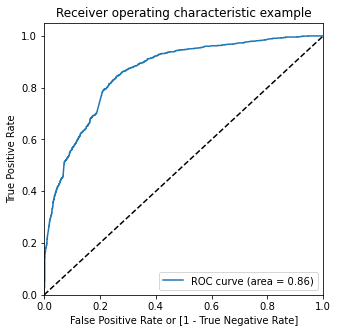

In [103]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve (AUC) of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also find the optimal cutoff point to get balanced sensitivity and specificity.

#### Finding Optimal Cutoff point

In [104]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Candidate_ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3303,1,0.863648,1,1,1,1,1,1,1,1,1,1,0
1,4262,1,0.722983,1,1,1,1,1,1,1,1,1,0,0
2,1024,0,0.185554,0,1,1,0,0,0,0,0,0,0,0
3,668,1,0.977170,1,1,1,1,1,1,1,1,1,1,1
4,2262,0,0.695266,1,1,1,1,1,1,1,1,0,0,0


In [105]:
#Let's calculate accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.520038  1.000000  0.000000
0.1   0.1  0.585878  0.992661  0.145129
0.2   0.2  0.707379  0.954128  0.440027
0.3   0.3  0.765267  0.927217  0.589795
0.4   0.4  0.789122  0.870336  0.701127
0.5   0.5  0.789758  0.795107  0.783963
0.6   0.6  0.745865  0.658104  0.840954
0.7   0.7  0.727099  0.573089  0.893970
0.8   0.8  0.680662  0.439144  0.942346
0.9   0.9  0.625954  0.302752  0.976143


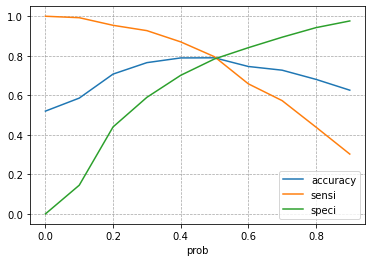

In [106]:
#Let's plot accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(which='major', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.show()

From the above curve, optimum cutoff probability to take is '0.5' in 'Sensitivity-Specificity' view.

In [107]:
#Create new column for the final prediction values

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Candidate_ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,3303,1,0.863648,1,1,1,1,1,1,1,1,1,1,0,1
1,4262,1,0.722983,1,1,1,1,1,1,1,1,1,0,0,1
2,1024,0,0.185554,0,1,1,0,0,0,0,0,0,0,0,0
3,668,1,0.977170,1,1,1,1,1,1,1,1,1,1,1,1
4,2262,0,0.695266,1,1,1,1,1,1,1,1,0,0,0,1


In [108]:
# Let's check overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7897582697201018

In [109]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[1183  326]
 [ 335 1300]]


From the above matrix we can say:

        A. [0,0] Number of Actual, Not-converted = 1183, which is also the Number of candidates predicted as Not-converted  ---> True_Negative
        B. [0,1] Number of Actual, Not-converted = 326, but these Number of candidates were predicted as converted          ---> False_Postive
        C. [1,0] Number of Actual, converted = 335, but these Number of candidates were predicted as not-converted          ---> False_Negative
        D. [1,1] Number of Actual, converted = 1300, which is also the Number of candidates predicted as converted          ---> True_Positive
     
So, let's evaluate the model based on: Acurracy, Sensitivity and Specificity

In [110]:
#Assign the values of metrics to calculate Sensitivity & Specificity

TP = confusion2[1,1] # True_Positive 
TN = confusion2[0,0] # True_Negatives
FP = confusion2[0,1] # False_Positives
FN = confusion2[1,0] # False_negatives

In [111]:
#Let's calculate the sensitivity of our model

TP/float(TP+FN) # True_Positive_Rate (TPR) = Recall

0.7951070336391437

In [112]:
#Let's calculate the specificity of our model

TN/float(TN+FP)  #True_Negative_Rate (TNR)

0.7839628893306826

In [113]:
#Let's calculate False Positive Rate (FPR)

FP/float(TN+FP)

0.21603711066931744

From the above results: TPR= 79% and TNR= 78% and low FPR; This cutoff point seems good to proceed with test set prediction;
However, let's also check difference in cutoff point in Precision and Recall view.

In [114]:
#Let's calculate the Positive Predicting value (Precision)

TP/float(TP+FP)

0.7995079950799509

In [115]:
#Using sklearn

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7995079950799509

In [116]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7951070336391437

##### Precision & Recall tradeoff

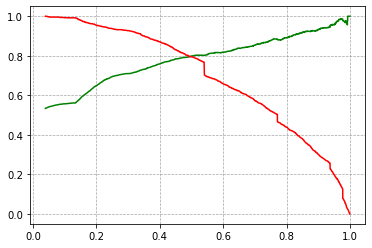

In [117]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], "r-")
plt.grid(which='major', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.show()

Precision-Recal view also gives cutoff near to 0.5. So, there is no much difference between 'Sensitivity-specificity view' and ''Precision-Recall' view.
So, with TPR= 79% and TNR= 78% and low FPR; at 0.5 probability cutoff let's proceed with test set prediction.

#### Making prediction on test set

In [118]:
#Feature Scaling

X_test[['TotalVisits', 'Page Views Per Visit', 
        'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 
                                                                   'Total Time Spent on Website']])

In [119]:
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [120]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
4056,0.069982,1,0,0,0,0,0,0
1886,0.133803,1,0,0,1,0,1,0
3243,0.825704,1,0,0,1,0,1,0
42,0.048856,1,1,0,0,0,0,0
3996,0.013644,1,0,0,1,0,0,0


In [121]:
# Fit a logistic Regression model on X_test after adding a constant and output the summary

X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(sm.add_constant(X_test_sm))
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4056,0.169843
1886,0.905633
3243,0.993233
42,0.027981
3996,0.319745


In [122]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [123]:
# Creating column 'Candidate ID' from Index

y_test_df['Candidate_ID'] = y_test_df.index

In [124]:
# Remove index for both dataframes to append them side by side 

y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Append y_test_df and y_test_pred_1

y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

y_pred_final.head()

,Converted,Candidate_ID,0
0,0,4056,0.169843
1,1,1886,0.905633
2,1,3243,0.993233
3,0,42,0.027981
4,0,3996,0.319745


In [126]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Candidate_ID,Conversion_Prob
0,0,4056,0.169843
1,1,1886,0.905633
2,1,3243,0.993233
3,0,42,0.027981
4,0,3996,0.319745


In [127]:
#Rearranging the columns

y_pred_final = y_pred_final.reindex(["Candidate_ID", "Converted", "Conversion_Prob"], axis=1)

In [128]:
# Make predictions on the test set using 0.5 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Candidate_ID,Converted,Conversion_Prob,final_predicted
0,4056,0,0.169843,0
1,1886,1,0.905633,1
2,3243,1,0.993233,1
3,42,0,0.027981,0
4,3996,0,0.319745,0


In [129]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7707715133531158

In [130]:
#Confusion matrix

confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[531, 158],
       [151, 508]], dtype=int64)

From the above matrix we can say:

        A. [0,0] Number of Actual, Not-converted = 531, which is also the Number of candidates predicted as Not-converted   ---> True_Negative
        B. [0,1] Number of Actual, Not-converted = 158, but these Number of candidates were predicted as converted          ---> False_Postive
        C. [1,0] Number of Actual, converted = 151, but these Number of candidates were predicted as not-converted          ---> False_Negative
        D. [1,1] Number of Actual, converted = 508, which is also the Number of candidates predicted as converted          ---> True_Positive
     
So, let's evaluate the model based on: Acurracy, Sensitivity and Specificity

In [131]:
#Assign the values of metrics to calculate Sensitivity & Specificity

TP = confusion3[1,1] # True_Positive 
TN = confusion3[0,0] # True_Negatives
FP = confusion3[0,1] # False_Positives
FN = confusion3[1,0] # False_negatives

In [132]:
#Let's calculate the sensitivity of our model

TP/float(TP+FN) # True_Positive_Rate (TPR)

0.7708649468892261

In [133]:
#Let's calculate the specificity of our model

TN/float(TN+FP)  #True_Negative_Rate (TNR)

0.7706821480406386

In [134]:
#Let's calculate False Positive Rate (FPR)

FP/float(TN+FP)

0.22931785195936139

#### Summary
Parameters of model for training and test data at 0.5 probability cut off.
    

    Train data          | Test Data 
    ------------------- |------------------
    Accuracy    : 0.789 | Accuracy     : 0.771 
    Sensitivity : 0.795 | Sensitivity  : 0.771 
    Specificity : 0.784 | Specificity  : 0.771
    
So, per CEO requirement target lead conversion rate to be around 80%.